In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

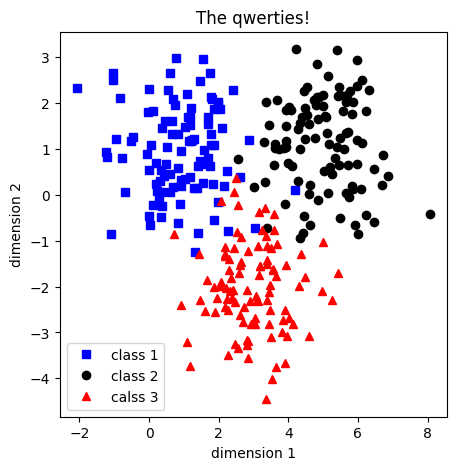

In [78]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [ 3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data_np = np.hstack((a,b, c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()

# true labels
labels = torch.zeros(len(data),dtype=torch.long)
labels[nPerClust+1:2*nPerClust+1] = 1
labels[2*nPerClust+1:] = 2

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.legend(['class 1','class 2', 'calss 3'])
plt.show()

## **Create ANN model**

In [79]:
# model architecture
ANNmodel = nn.Sequential(
    nn.Linear(2,4),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(4,4),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(4,3), # output layer
    nn.Softmax(dim=1)
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNmodel.parameters(),lr=.01)


## **Train the model**

In [81]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNmodel(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNmodel(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [82]:
predictions.shape

torch.Size([300, 3])

## **Visualize the Results**

Final accuracy: 95.3333%


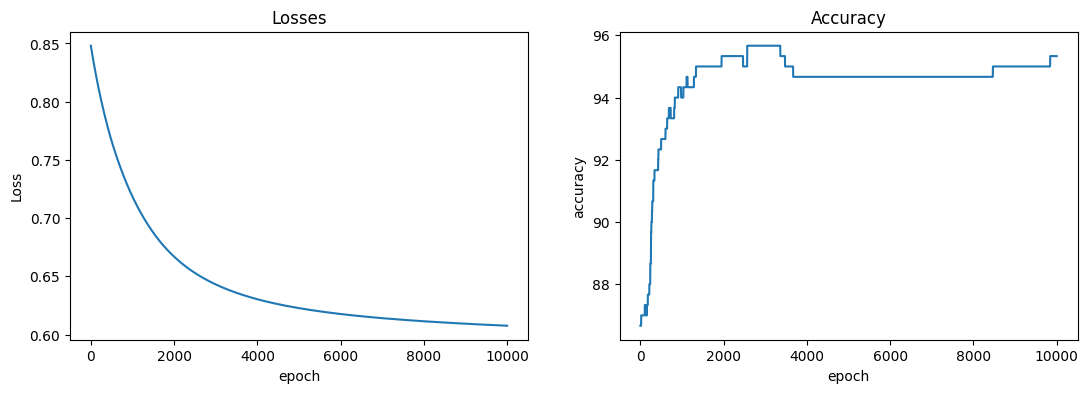

In [83]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show();

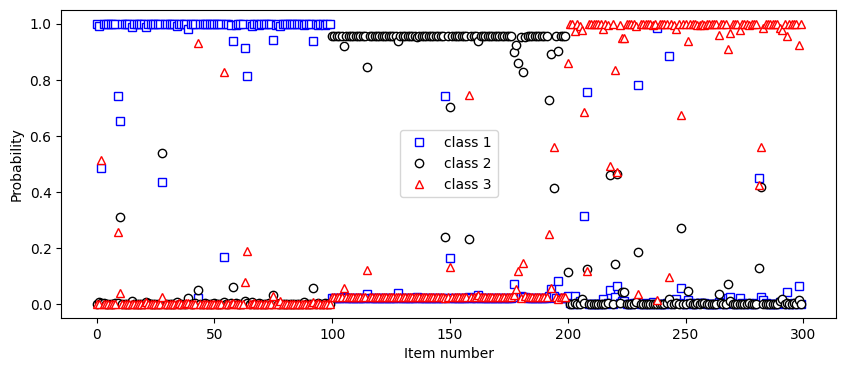

In [84]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = ['bs', 'ko', 'r^']

for i in range(3):
  plt.plot(yHat[:,i].detach().numpy(),colorshape[i],markerfacecolor='w')

plt.xlabel('Item number')
plt.ylabel('Probability')
plt.legend(['class 1','class 2','class 3'])
plt.show();
